# Brownian Motion
Brownian motion is also called Wiener Process. There are several ways to define the Wiener process $W=\{W(t),t\geqslant0\}$, and one is following:
* It is a Gaussian process with countinuous paths.
* $W(0)=0$ with probability 1.
* $\mathop{\mathbb{E}}[W(t)]=0$ and $Var(W(t)-W(s))=t-s$.
* Independent and Stationary.

## Brownian Motion as the limit of Random Walk
As a result of the Central limit theorem, Brownian motion can be seen as the limit of Random walk. It would be define as the following:
Given a sequence of i.i.d. random variables $\{X_i\}_{i=\overline{1..n}}$, taking only two values -1 and +1 with equal probability and considering the partial sum:
$$S_n = X_1 + X_2 + ... + X_n.$$
Then,
$$\lim_{n\rightarrow\infty}P\left(\frac{S_{[nt]}}{\sqrt{n}} < x\right) = P(W(t) < x)$$

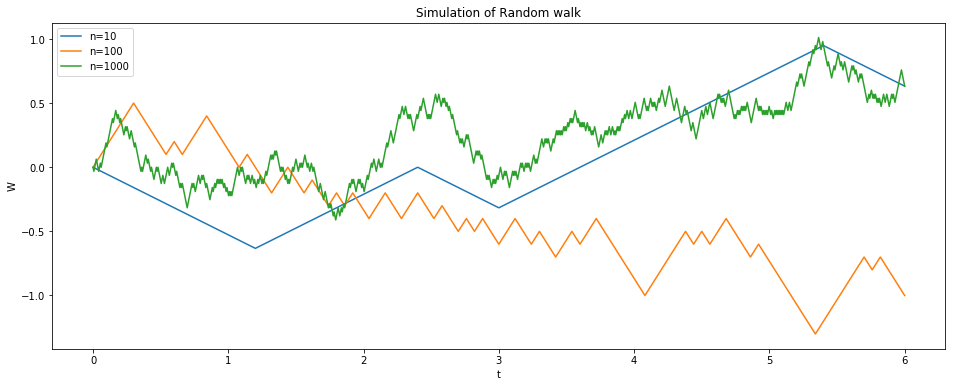

In [1]:
import numpy as np
import matplotlib.pyplot as plt

n=[10,100,1000] # number of times
m=1 # number of processes
T = 6 # the end time
t = [np.linspace(0,T,x+1) for x in n]
# the sequence of random variables taking values -1 and 1 with equal probability
X_t = [2*(np.random.rand(x,m) > 0.5)-1 for x in n]
# The Wiener process
S_n = [np.cumsum(x_t,axis=0) for x_t in X_t]
W_t = S_n/np.sqrt(n)
# The start W(0)
zeros = np.zeros((1,m))
W_t = [np.r_[zeros,w_t] for w_t in W_t]

plt.figure(figsize=(16,6))
plt.plot(t[0],W_t[0])
plt.plot(t[1],W_t[1])
plt.plot(t[2],W_t[2])
plt.legend(['n=10','n=100','n=1000'])
plt.xlabel('t')
plt.ylabel('W')
plt.title('Simulation of Random walk')
plt.savefig('Random walk.png')
plt.show()

# Brownian motion paths are nowhere differentiable
The brownian motion has infinity simple variation (i.e., $V_t(W)=\infty$) and covariance function $Cov(W(s),W(t))=s \wedge t$, where $s \wedge t = min(s,t)$. Its paths are continuous but nowhere differtiable.
$$ W(t) = W(t,\omega) = \sum_{i=0}^{\infty}{Z_i(\omega)\phi_i(t)}, $$
where,
$$ \phi_i(t) = \frac{2\sqrt{2T}}{(2i+1)\pi}\sin{\left(\frac{(2i+1)\pi t}{2T}\right)} $$

[  1.00000000e-07   3.44924138e-04   6.89748276e-04   1.03457241e-03
   1.37939655e-03   1.72422069e-03   2.06904483e-03   2.41386897e-03
   2.75869310e-03   3.10351724e-03   3.44834138e-03   3.79316552e-03
   4.13798966e-03   4.48281379e-03   4.82763793e-03   5.17246207e-03
   5.51728621e-03   5.86211034e-03   6.20693448e-03   6.55175862e-03
   6.89658276e-03   7.24140690e-03   7.58623103e-03   7.93105517e-03
   8.27587931e-03   8.62070345e-03   8.96552759e-03   9.31035172e-03
   9.65517586e-03   1.00000000e-02]
0.0661286312648


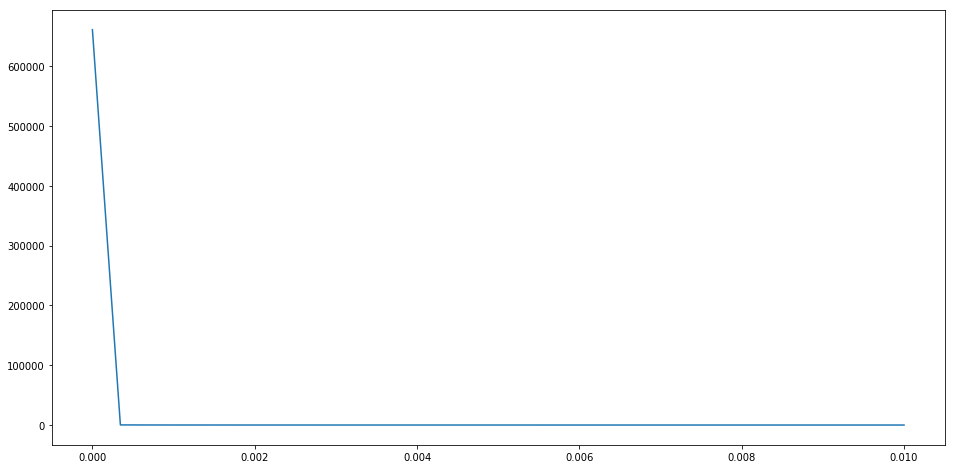

In [16]:
import numpy as np
import matplotlib.pyplot as plt
# phi function
def phi(i,t,T):
    return (2*np.sqrt(2*T))/((2*i+1)*np.pi) * np.sin(((2*i+1)*np.pi*t)/(2*T))

n = 100
T = 1 # the end time
delta_t = np.linspace(1e-7,1e-2,30) # the delta t's
print(delta_t)

Z = np.random.normal(0,1,n) # the sequence of random variables with Standard Normal distribution
# Compute phi at t=0.5
Phi = [phi(x,0.5,T) for x in range(1,101)]
W = np.dot(Z,Phi)

# Compute the increasing ratio
inc_ratio = list()
for i in delta_t:
    # Compute phi at t + delta_t
    temp = [phi(x,0.5+i,T) for x in range(1,101)]
    Wh = np.dot(Z,temp)
inc_ratio = abs(Wh-W)/delta_t

plt.figure(figsize=(16,8))
plt.plot(delta_t,inc_ratio)
plt.show()

## Geometric Brownian Motion
$$ S(t) = S(0)exp\left\{ \left(r - \frac{\sigma^2}{2}\right)t+\sigma W(t) \right\}, t>0,$$ 

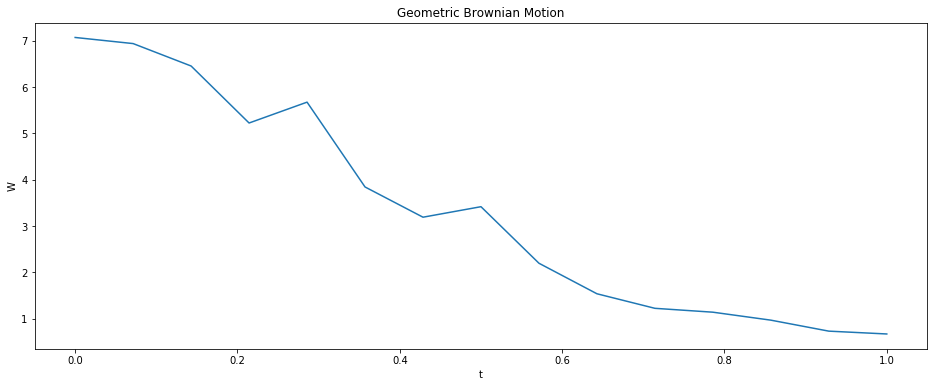

In [14]:
import numpy as np
import matplotlib.pyplot as plt

r = -1
sigma = 0.7
n = 15
T = 1
S0 = 10
Delta = T/n # step time

Z = np.random.normal(0,1,n) * np.sqrt(Delta) # the sequence of random variables
t = np.linspace(0,T,n)
W_t = np.cumsum(Z) # the Wiener process

S_t = S0 * np.exp((r-np.power(sigma,2)/2)*t+sigma*W_t)

plt.figure(figsize=(16,6))
plt.plot(t,S_t)
plt.xlabel('t')
plt.ylabel('W')
plt.title("Geometric Brownian Motion")
plt.savefig('Geometric_Brownian_Motion_05.png')
plt.show()

## Brownian Bridge
Another useful and interesting manipulation of the Wiener process is so-called Brownian Bridge, which is the Brownian motion start at $x$ at time $t_0$ and passing through some point $y$ at time $T$, $T>0$. It is defined as:
$$ W_{t_0,x}^{T,y}(t) = x + W(t-t_0) - \frac{t-t_0}{T-t_0}(W(T-t_0)-y+x) $$
More precisely, this is the process $\left\{ W(t),t_0<t<T|W(t_0)=x,W(T)=y\right\}$

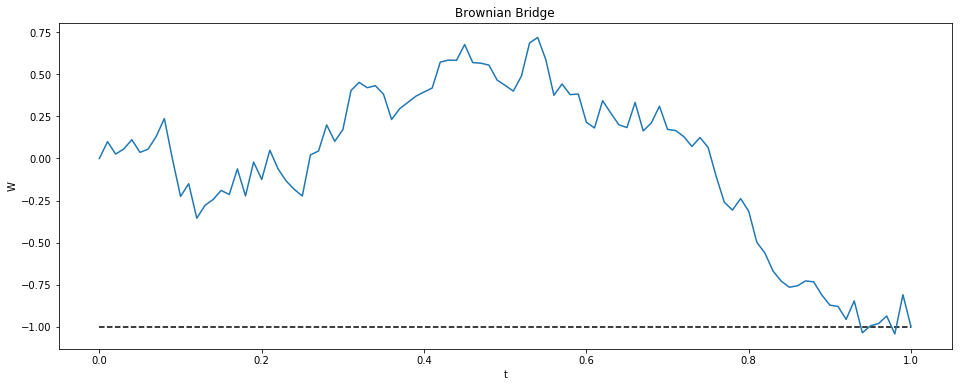

In [4]:
import numpy as np
import matplotlib.pyplot as plt

n = 100
T = 1
Delta = T/n
Z = np.random.normal(0,1,n) * np.sqrt(Delta)
W_t = np.cumsum(Z)
W_t = np.insert(W_t,0,0)
t = np.linspace(0,T,n+1)

x = 0
y = -1
BB = x + W_t - (t/T)*(W_t[-1]-y+x)

plt.figure(figsize=(16,6))
plt.plot(t,BB)
plt.hlines(-1,xmin=0,xmax=1,linestyle='dashed')
plt.xlabel('t')
plt.ylabel('W')
plt.title("Brownian Bridge")
plt.savefig('Brownian_Bridge.png')
plt.show()